In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/forca-de-trabalho---17-04-18-csv.csv',encoding='latin1',delimiter = ';')



In [3]:
df.head(6)

,MATRICULA,NOME DO SERVIDOR,CPF,DATA NASCIMENTO,DESC CARGO,CARREIRA,UA/LOTACAO,REGIONAL,DESCRICAO LOTACAO,CODIGO DA LOTACAO,...,STATUS,DESC DA FUNCAO,DT. ADMISSAO,DESC MOTIVO DE AFASTAMENTO,DT AFAST,DESC DO MOTIVO DE DESLIGAMENTO,DT DESL,MOT APOS,DT APOS,SITUACAO FUNCIONAL
0,1214322,EDUARDO & MÔNICA,000.000.000-00,23/04/2018,TÉCNICO ADMINISTRATIVO,TÉCNICO EM SAÚDE,ADMC,ADMC - AFAST. DIVERSOS,ADMC - DRH DIVERSOS,10900000,...,3 - AFASTADO,NaN,05/08/1983,AFASTAMENTO PARA EXERCICIO DE MANDATO ELETIVO ...,01/01/2015,HISTORICO DE DESLIGAMENTO,NaN,0,NaN,7
1,1270060,ANTONIO AGAMENON TORRES VIANA,000.000.000-00,23/04/2018,TÉCNICO EM ENFERMAGEM,TÉCNICO EM SAÚDE,ADMC,ADMC - AFAST. DIVERSOS,ADMC - DRH DIVERSOS,10900000,...,3 - AFASTADO,NaN,07/11/1986,"LICENCA DESEMPENHO MANDATO CLASSISTA - O1, ART...",26/04/2017,HISTORICO DE DESLIGAMENTO,NaN,0,NaN,7
2,1284541,ANTONIO GERALDO DA SILVA,000.000.000-00,23/04/2018,MEDICO - PSIQUIATRIA,MÉDICO,ADMC,ADMC - AFAST. DIVERSOS,ADMC - DRH DIVERSOS,10900000,...,3 - AFASTADO,NaN,26/08/1988,"LICENCA MANDATO CLASSISTA - ART.145, PAR.2, LC...",05/03/2015,HISTORICO DE DESLIGAMENTO,NaN,0,NaN,7
3,1303724,MARCOS GUTEMBERG FIALHO DA COSTA,000.000.000-00,23/04/2018,MEDICO - GINECOLOGIA E OBSTETRÍCIA,MÉDICO,ADMC,ADMC - AFAST. DIVERSOS,ADMC - DRH DIVERSOS,10900000,...,3 - AFASTADO,NaN,02/01/1991,"LICENCA DESEMPENHO MANDATO CLASSISTA - O1, ART...",06/10/2014,HISTORICO DE DESLIGAMENTO,NaN,0,NaN,7
4,0132487X,CARLOS FERNANDO DA SILVA,000.000.000-00,23/04/2018,MEDICO - GINECOLOGIA E OBSTETRÍCIA,MÉDICO,ADMC,ADMC - AFAST. DIVERSOS,ADMC - DRH DIVERSOS,10900000,...,3 - AFASTADO,NaN,08/02/1993,"LICENCA DESEMPENHO MANDATO CLASSISTA - O1, ART...",17/08/2012,HISTORICO DE DESLIGAMENTO,NaN,0,NaN,7
5,1324934,CELIO RIBEIRO JUNIOR,000.000.000-00,23/04/2018,MEDICO - GINECOLOGIA E OBSTETRÍCIA,MÉDICO,ADMC,ADMC - AFAST. DIVERSOS,ADMC - DRH DIVERSOS,10900000,...,3 - AFASTADO,NaN,01/02/1993,AFAST. EXERCICIO DE MANDATO ELETIVO C/REMUN. A...,01/01/2017,HISTORICO DE DESLIGAMENTO,NaN,0,NaN,7


In [4]:
df.shape

(34685, 23)

In [5]:
df.columns

Index(['MATRICULA', 'NOME DO SERVIDOR', 'CPF', 'DATA NASCIMENTO', 'DESC CARGO',
       'CARREIRA', 'UA/LOTACAO', 'REGIONAL', 'DESCRICAO LOTACAO',
       'CODIGO DA LOTACAO', 'C.H 1', 'DESC SEXO', 'DESC SIT FUNC', 'STATUS',
       'DESC DA FUNCAO', 'DT. ADMISSAO', 'DESC MOTIVO DE AFASTAMENTO',
       'DT AFAST', 'DESC DO MOTIVO DE DESLIGAMENTO', 'DT DESL', 'MOT APOS',
       'DT APOS', 'SITUACAO FUNCIONAL'],
      dtype='object')

### Total de servidores

In [6]:
df.shape[0]

34685

## Contagem por Carreira

In [7]:
grouped = df.groupby('CARREIRA')
grouped['MATRICULA'].count().sort_values(ascending=False)

CARREIRA
TÉCNICO EM SAÚDE                           16165
MÉDICO                                      5185
ENFERMEIRO                                  3328
ESPECIALISTA EM SAÚDE                       2721
AUXILIAR DE SAÚDE                           2018
RESIDENTE                                   1475
EMPREGO COMUNITÁRIO DO DISTRITO FEDERAL     1422
OUTRAS                                      1245
PPGG                                         587
CIRURGIÃO-DENTISTA                           518
CONSELHEIRO DE SAUDE                          19
#N/D                                           2
Name: MATRICULA, dtype: int64

#### não tem os 8 mil auxiliares de enfermagem do dataset de distribuiçao de pessoal
¯\\_(ツ)_/¯
[notebook da distribuição de pessoal](https://github.com/chris-redfield/hacksaude-2018/blob/master/ditribuicao-profissionais.ipynb)

Talvez sejam esses Técnicos em Saúde ?

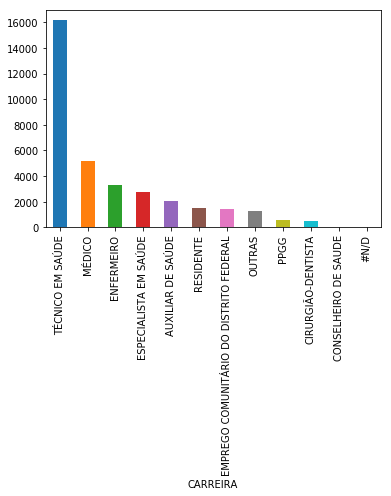

In [8]:
grouped['MATRICULA'].count().sort_values(ascending=False).plot.bar()

## Contagem por estado

In [9]:
grouped = df.groupby('STATUS')
grouped['MATRICULA'].count().sort_values(ascending=False)

STATUS
2 - NORMAL             31779
3 - AFASTADO            1248
7 - REQUISITADO         1065
1 - INCLUIDO NO MES      314
8 - CEDIDO               279
Name: MATRICULA, dtype: int64

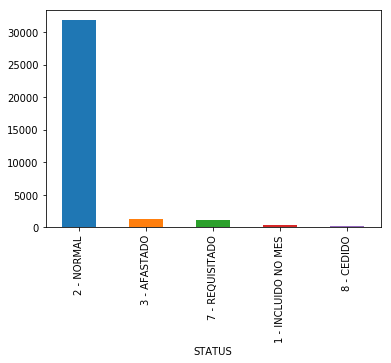

In [10]:
grouped['MATRICULA'].count().sort_values(ascending=False).plot.bar()

## Percentual de servidores afastados

In [11]:
df[df['STATUS']=='3 - AFASTADO'].count()['MATRICULA'] * 100 / df.shape[0]

3.598097160155687

poucos, então esse não é o problema da secretaria ;p

## Contagem por unidade de lotação

In [12]:
grouped = df.groupby('UA/LOTACAO')
grouped['MATRICULA'].count().sort_values(ascending=False)

UA/LOTACAO
SUPERINTENDENCIA DA REGIAO DE SAUDE SUDOESTE        5280
SUPERINTENDENCIA DA REGIAO DE SAUDE SUL             4687
ADMC                                                4239
SUPERINTENDENCIA DA REGIAO DE SAUDE CENTRO-SUL      3758
SUPERINTENDENCIA DA REGIAO DE SAUDE OESTE           3581
SUPERINTENDENCIA DA REGIAO DE SAUDE NORTE           3452
HBDF                                                3425
SUPERINTENDENCIA DA REGIAO DE SAUDE CENTRO-NORTE    2369
SUPERINTENDENCIA DA REGIAO DE SAUDE LESTE           2176
COMPLEXO REGULADOR EM SAUDE DO DISTRITO FEDERAL     1088
HOSPITAL DE APOIO                                    315
HSVP                                                 309
DRS - PARANOA                                          2
DRS - SOBRADINHO                                       1
DRS - RECANTO DAS EMAS                                 1
DRS - ASA NORTE                                        1
COMPP                                                  1
Name: MATRICULA, dty

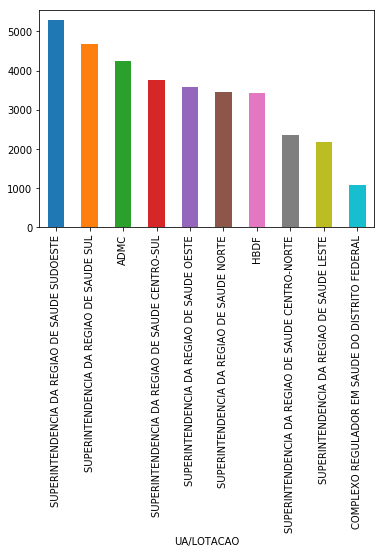

In [13]:
grouped['MATRICULA'].count().sort_values(ascending=False)[:10].plot.bar()

#### dados não batem 100% com o dataset de distribuição de pessoal, mas estão próximos ^^
¯\\_(ツ)_/¯
[notebook da distribuição de pessoal](https://github.com/chris-redfield/hacksaude-2018/blob/master/ditribuicao-profissionais.ipynb#Quantidade-de-servidores-por-unidade)



## Distribuição por gênero

In [14]:
grouped = df.groupby('DESC SEXO')
grouped['MATRICULA'].count().sort_values(ascending=False)

DESC SEXO
F    24204
M    10481
Name: MATRICULA, dtype: int64

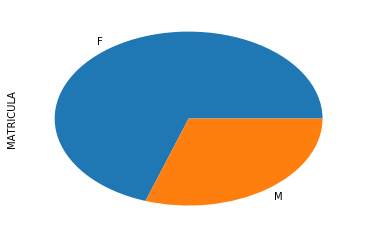

In [15]:
grouped['MATRICULA'].count().sort_values(ascending=False).plot.pie()